In [1]:
import tensorflow as tf
import os

2024-05-06 02:10:36.029311: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 02:10:36.112863: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 02:10:36.349140: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 02:10:36.349232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 02:10:36.382371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import cv2
import imghdr

In [3]:
data_dir='photos'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [6]:
import numpy as np
from matplotlib import pyplot as plt


In [7]:
data = tf.keras.utils.image_dataset_from_directory('photos')


Found 576 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()


In [9]:
batch = data_iterator.next()

2024-05-06 02:12:11.052780: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 219 of 256
2024-05-06 02:12:12.477891: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [10]:
batch[0].shape

(32, 256, 256, 3)

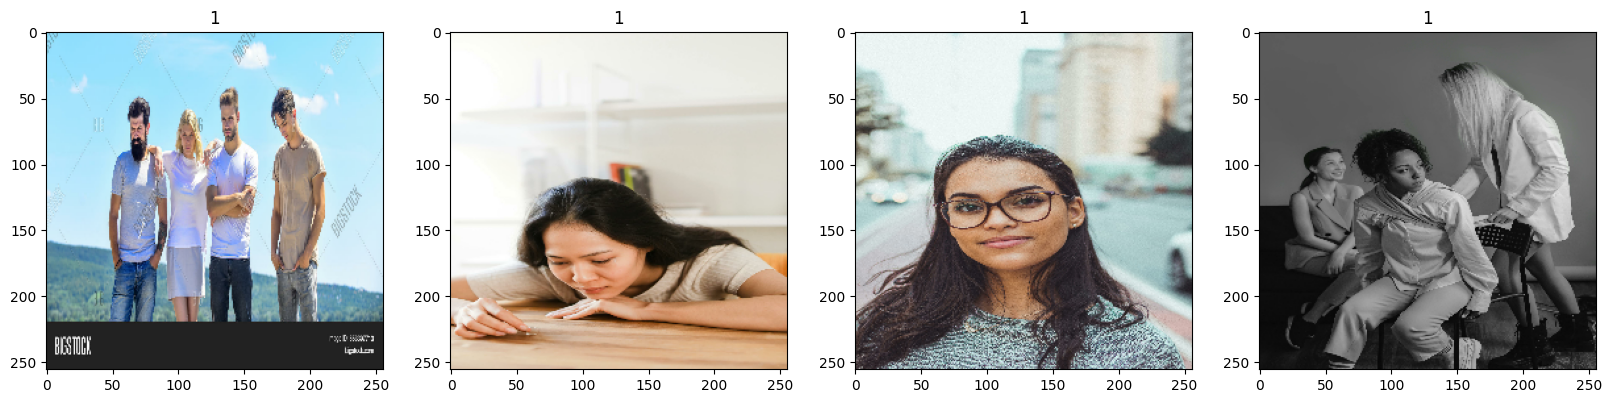

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
batch[0].max()

255.0

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
scaled_iterator= data.as_numpy_iterator()
scaled_iterator

In [15]:
batch = scaled_iterator.next()

2024-05-06 02:12:25.468680: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 225 of 256
2024-05-06 02:12:26.656654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [16]:
batch[0].max()

1.0

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
print(train_size, val_size, test_size)

12 4 2


In [18]:
val_size

4

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

print(test,val)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-05-06 02:12:40.997119: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 155 of 256
2024-05-06 02:12:45.091914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


12/12 [==============================] - ETA: 0s - loss: 0.9275 - accuracy: 0.5208

2024-05-06 02:13:13.064525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 255 of 256
2024-05-06 02:13:13.064607: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.
2024-05-06 02:13:26.746288: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 59s 4s/step - loss: 0.9275 - accuracy: 0.5208 - val_loss: 0.6698 - val_accuracy: 0.6172
Epoch 2/20


2024-05-06 02:13:37.478938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 254 of 256
2024-05-06 02:13:37.522212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


12/12 [==============================] - ETA: 0s - loss: 0.6434 - accuracy: 0.6589

2024-05-06 02:14:18.679040: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 52s 4s/step - loss: 0.6434 - accuracy: 0.6589 - val_loss: 0.7112 - val_accuracy: 0.5391
Epoch 3/20


2024-05-06 02:14:29.364396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 237 of 256
2024-05-06 02:14:29.895766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


12/12 [==============================] - 52s 4s/step - loss: 0.6682 - accuracy: 0.6302 - val_loss: 0.6095 - val_accuracy: 0.6641
Epoch 4/20
12/12 [==============================] - 38s 3s/step - loss: 0.6064 - accuracy: 0.6536 - val_loss: 0.5593 - val_accuracy: 0.7734
Epoch 5/20
12/12 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.7422

2024-05-06 02:16:26.743829: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 38s 3s/step - loss: 0.5300 - accuracy: 0.7422 - val_loss: 0.5830 - val_accuracy: 0.6953
Epoch 6/20
12/12 [==============================] - 39s 3s/step - loss: 0.5109 - accuracy: 0.7708 - val_loss: 0.4737 - val_accuracy: 0.7812
Epoch 7/20
12/12 [==============================] - 38s 3s/step - loss: 0.4591 - accuracy: 0.7682 - val_loss: 0.4126 - val_accuracy: 0.8359
Epoch 8/20
12/12 [==============================] - 37s 3s/step - loss: 0.3843 - accuracy: 0.8359 - val_loss: 0.3036 - val_accuracy: 0.8672
Epoch 9/20
12/12 [==============================] - ETA: 0s - loss: 0.3125 - accuracy: 0.8620

2024-05-06 02:19:01.288403: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 38s 3s/step - loss: 0.3125 - accuracy: 0.8620 - val_loss: 0.2814 - val_accuracy: 0.8828
Epoch 10/20
12/12 [==============================] - ETA: 0s - loss: 0.2944 - accuracy: 0.8672

2024-05-06 02:19:40.753075: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 40s 3s/step - loss: 0.2944 - accuracy: 0.8672 - val_loss: 0.2908 - val_accuracy: 0.8672
Epoch 11/20


2024-05-06 02:19:51.376092: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 254 of 256
2024-05-06 02:19:51.430325: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


12/12 [==============================] - 43s 3s/step - loss: 0.2773 - accuracy: 0.9062 - val_loss: 0.3589 - val_accuracy: 0.8438
Epoch 12/20
12/12 [==============================] - 39s 3s/step - loss: 0.2754 - accuracy: 0.8958 - val_loss: 0.2494 - val_accuracy: 0.9062
Epoch 13/20
12/12 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9401

2024-05-06 02:21:41.835908: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 38s 3s/step - loss: 0.1964 - accuracy: 0.9401 - val_loss: 0.2727 - val_accuracy: 0.8906
Epoch 14/20
12/12 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9167

2024-05-06 02:22:20.648666: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 39s 3s/step - loss: 0.2139 - accuracy: 0.9167 - val_loss: 0.2217 - val_accuracy: 0.9062
Epoch 15/20
12/12 [==============================] - 39s 3s/step - loss: 0.1600 - accuracy: 0.9401 - val_loss: 0.1804 - val_accuracy: 0.9062
Epoch 16/20
12/12 [==============================] - ETA: 0s - loss: 0.1581 - accuracy: 0.9297

2024-05-06 02:23:38.225742: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 41s 3s/step - loss: 0.1581 - accuracy: 0.9297 - val_loss: 0.1428 - val_accuracy: 0.9453
Epoch 17/20
12/12 [==============================] - 45s 3s/step - loss: 0.1739 - accuracy: 0.9297 - val_loss: 0.2111 - val_accuracy: 0.9141
Epoch 18/20
12/12 [==============================] - ETA: 0s - loss: 0.1481 - accuracy: 0.9557

2024-05-06 02:25:03.164640: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 37s 3s/step - loss: 0.1481 - accuracy: 0.9557 - val_loss: 0.2567 - val_accuracy: 0.8672
Epoch 19/20
12/12 [==============================] - 38s 3s/step - loss: 0.1718 - accuracy: 0.9245 - val_loss: 0.1390 - val_accuracy: 0.9375
Epoch 20/20
12/12 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.9245

2024-05-06 02:26:23.713828: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


12/12 [==============================] - 40s 3s/step - loss: 0.1928 - accuracy: 0.9245 - val_loss: 0.1495 - val_accuracy: 0.9219


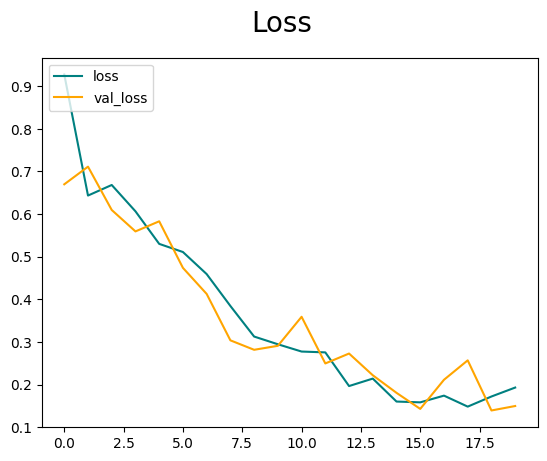

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

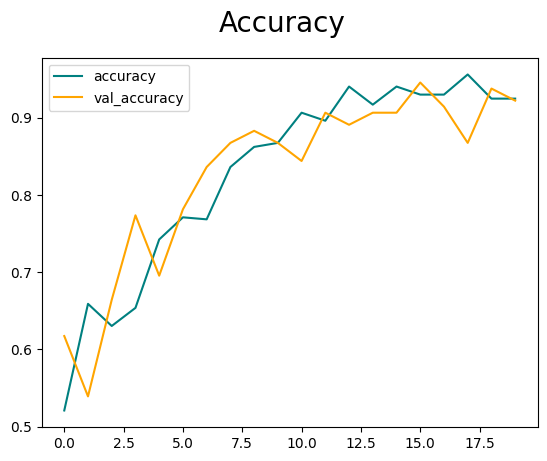

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [51]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 93ms/step


In [52]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.88, shape=(), dtype=float32) tf.Tensor(0.953125, shape=(), dtype=float32)


testing-

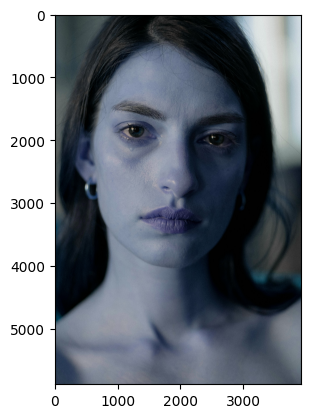

In [93]:
img = cv2.imread('test-images/1sad.jpg')
plt.imshow(img)
plt.show()

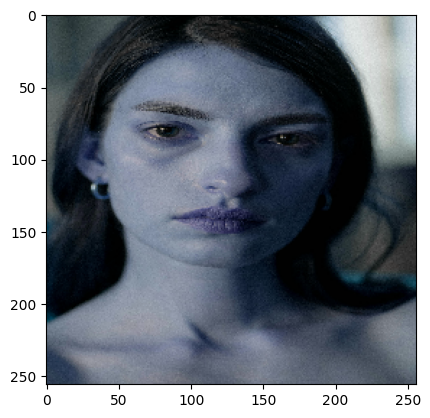

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [96]:
yhat

array([[0.99621147]], dtype=float32)

In [97]:
if yhat > 0.5 and yhat<0.8: 
    print("subject is Sad")
elif yhat>=0.8:
    print("subject is so sad")
elif yhat<=0.5 and yhat>0.3:
    print("subject is happy")
else:
    print('subject is so Happy')

subject is so sad
